<a href="https://colab.research.google.com/github/anoopjakob/AI_Lab_8_Linear_regression/blob/main/AI_lab_8_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# importing some models for testing
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
# # upload files from local system

# from google.colab import files
# uploaded = files.upload()

## copy a file to another location.. in this case into google drive folder
# !cp '/content/1-D_x.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/1-D_y.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/2-D_x.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'
# !cp '/content/2-D_y.csv' '/content/drive/MyDrive/AI-ML/AI_Lab_8'


In [ ]:
 
     # LOADING AND PREPROCESSING DATA


one_d_X_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/1-D_x.csv')
# giving appropriate column names
one_d_X_df.rename(columns={'column1':'Age'}, inplace=True)
print(one_d_X_df.describe())
# print(one_d_X_df)

print('\n')


one_d_Y_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/1-D_y.csv')
one_d_Y_df.rename(columns={'column1':'Height'}, inplace=True)
print(one_d_Y_df.describe())


print('\n')

two_d_X_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/2-D_x.csv')
two_d_X_df.rename(columns={'column1':'Living_Area',
                           'column2':'Number_of_Bedroom'},inplace=True)
print(two_d_X_df.describe())

print('\n')

two_d_Y_df = pd.read_csv('/content/drive/MyDrive/AI-ML/AI_Lab_8/2-D_y.csv')
two_d_Y_df.rename(columns={'column1':'Prices'}, inplace=True)
print(two_d_Y_df.describe())



             Age
count  50.000000
mean    4.923800
std     1.727304
min     2.070000
25%     3.412500
50%     4.835000
75%     6.312500
max     7.930000


          Height
count  50.000000
mean    1.064680
std     0.119296
min     0.779000
25%     0.964500
50%     1.080000
75%     1.147500
max     1.300000


       Living_Area  Number_of_Bedroom
count    47.000000          47.000000
mean   2001.106383           3.170213
std     795.271986           0.760982
min     852.000000           1.000000
25%    1435.000000           3.000000
50%    1890.000000           3.000000
75%    2270.000000           4.000000
max    4480.000000           5.000000


              Prices
count      47.000000
mean   340412.659574
std    125039.899586
min    169900.000000
25%    249900.000000
50%    299900.000000
75%    384450.000000
max    699900.000000


Single Variate Linear Regression using scikit learn 
 

Model Score:  0.8590387244123388
predicted heights 
 age 3.5 : [0.9735393] 
 age 7 : [1.19758231]


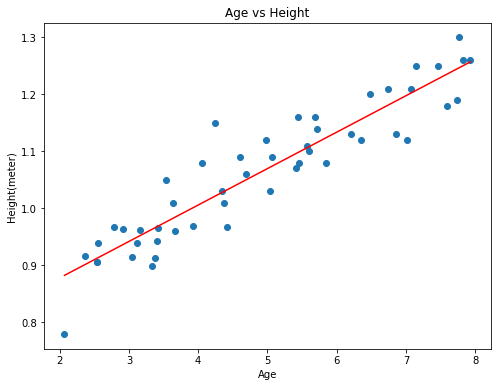

In [ ]:

        # SINGLE VARIATE LINEAR REGRESSION USING SCIKIT LEARN


print('Single Variate Linear Regression using scikit learn \n \n')

X = one_d_X_df.Age.to_numpy() # to numpy array
X = X.reshape(-1,1) #array in array

y = one_d_Y_df.Height.to_numpy() # to numpy array

reg = LinearRegression().fit(X, y) # here both model selection and fitting happens

print("Model Score: ", reg.score(X, y)) # to print the model score..

y_pred = reg.predict(X) # These are the predictions which we will use to plot 

print(f'predicted heights \n age 3.5 : {reg.predict(np.array([[3.5]]))} \n age 7 : {reg.predict(np.array([[7]]))}')

# plotting
plt.figure(figsize=(8,6))
plt.scatter(one_d_X_df.Age, one_d_Y_df.Height)
plt.plot(one_d_X_df.Age, y_pred, color = 'red')
plt.xlabel('Age')
plt.ylabel('Height(meter)')
plt.title("Age vs Height")
plt.show()

In [ ]:

          # MULTIVARIATE LINEAR REGRESSION USING SCIKIT LEARN


print("Multi variate linear regression using scikit learn")

X = two_d_X_df.values

y = two_d_Y_df.values

reg = LinearRegression().fit(X, y) #here both model selection and fitting happens

print("Model Score: ", reg.score(X, y)) # to print the model score..
 # These are the predictions which we will use to plot 

predicted_price = reg.predict(np.array([[1650, 3]]))

print('predicted price for 1650 sqft and 3 bedrooms:', predicted_price)

Multi variate linear regression using scikit learn
Model Score:  0.7324340514838916
predicted price for 1650 sqft and 3 bedrooms: [[293075.17290841]]


In [ ]:

# these coordinates are found out usinn reg.predict()
# by handpicking values such that each bedroom no is contained in the vector

list1 = [1000,1, 219974.50369809]
list2 = [1320,2,255829.80910009 ]
list3  = [1990, 4 , 331710.59512304]




p1 = np.array(list1)
p2 = np.array(list2)




p3 = np.array(list3)

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp

# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)

print(f'The equation to plot the plane is \n \n {a}x + {b}y + {c}z = {d}')

Z = (d-a*X - b*Y)/c

The equation to plot the plain is 
 
 -4170.175218950026x + 258796.90800400823y + 30.0z = 2687856.7999966824


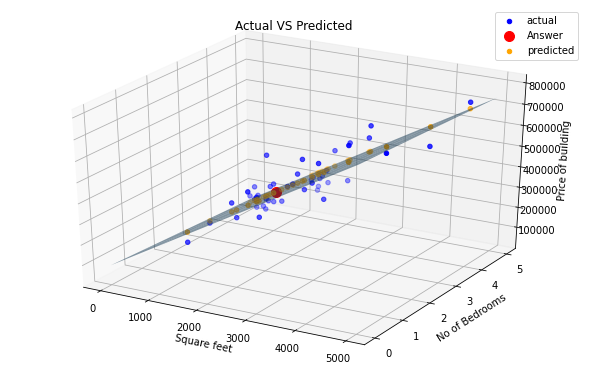

In [427]:
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)

#plotting the points

ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             two_d_Y_df.Prices, color = "blue", label = 'actual')

ax.scatter3D([1650], [3], reg.predict(np.array([[1650, 3]])), 
             color='red', s=100, label='Answer')

ax.scatter3D(two_d_X_df.Living_Area, two_d_X_df.Number_of_Bedroom, 
             reg.predict(two_d_X_df.values), color = 'orange',label='predicted')



X = np.arange(0,6000 , 1000)
Y = np.arange(0, 6, 1)
X, Y = np.meshgrid(X, Y)
Z = (d-a*X - b*Y)/c 

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=.5)


ax.set_xlabel('Square feet')
ax.set_ylabel('No of Bedrooms')
ax.set_zlabel('Price of building')

plt.title('Actual VS Predicted ')
plt.legend()
plt.show()